In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from openpyxl import load_workbook

wb = load_workbook("../1.xlsx")
sheets = wb.worksheets
sheet_point_list = sheets[0]
sheet_distance = sheets[1]
targetCamp = "red"
enemyCamp = "blue"
pointListAll = np.array(list(sheet_point_list.values)[1:])

pointMap = {}
for row in np.around(np.array(pointListAll[:, [0, 1, 2]], float), 2):
    pointMap[int(row[0])] = row

pointList = pointListAll[pointListAll[:, 3] == targetCamp]
pointList = pointList[:, [0, 1, 2]]
pointList = np.around(np.array(pointList, float), 2)

pointEnemyList = pointListAll[pointListAll[:, 3] == enemyCamp]
pointEnemyList = pointEnemyList[:, [0, 1, 2]]
pointEnemyList = np.around(np.array(pointEnemyList, float), 2)

In [2]:
# 导入攻击路线图
wb = load_workbook("./Red Team Attack Plan.xlsx")
redTeamAttackPlanSheet = wb.worksheets[0]
redTeamAttackPlan = np.array(list(redTeamAttackPlanSheet.values), str)[:, 2:]
redTeamAttackPlanLinerList = redTeamAttackPlan.reshape(-1)
redTeamAttackPlanLinerList = np.array(
    np.unique(redTeamAttackPlanLinerList[redTeamAttackPlanLinerList != "None"]), int
)
redTeamAttackPlan

array([['111', '112', '131', '90', '91', '96', '76', 'None', 'None',
        'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None',
        'None', 'None', 'None', 'None', 'None', 'None', 'None'],
       ['120', '117', '130', '112', '131', '90', '91', '96', '76',
        'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None',
        'None', 'None', 'None', 'None', 'None', 'None', 'None'],
       ['98', '99', '100', '120', '117', '130', '112', '131', '90', '91',
        '96', '76', 'None', 'None', 'None', 'None', 'None', 'None',
        'None', 'None', 'None', 'None', 'None', 'None'],
       ['331', '330', '97', '121', '94', '120', '117', '130', '112',
        '131', '90', '91', '96', '76', 'None', 'None', 'None', 'None',
        'None', 'None', 'None', 'None', 'None', 'None'],
       ['292', '350', '293', '294', '295', '312', '313', '28', '49',
        '89', '75', '118', '121', '94', '120', '117', '130', '112',
        '131', '90', '91', '96', '76', 'None'],
       ['

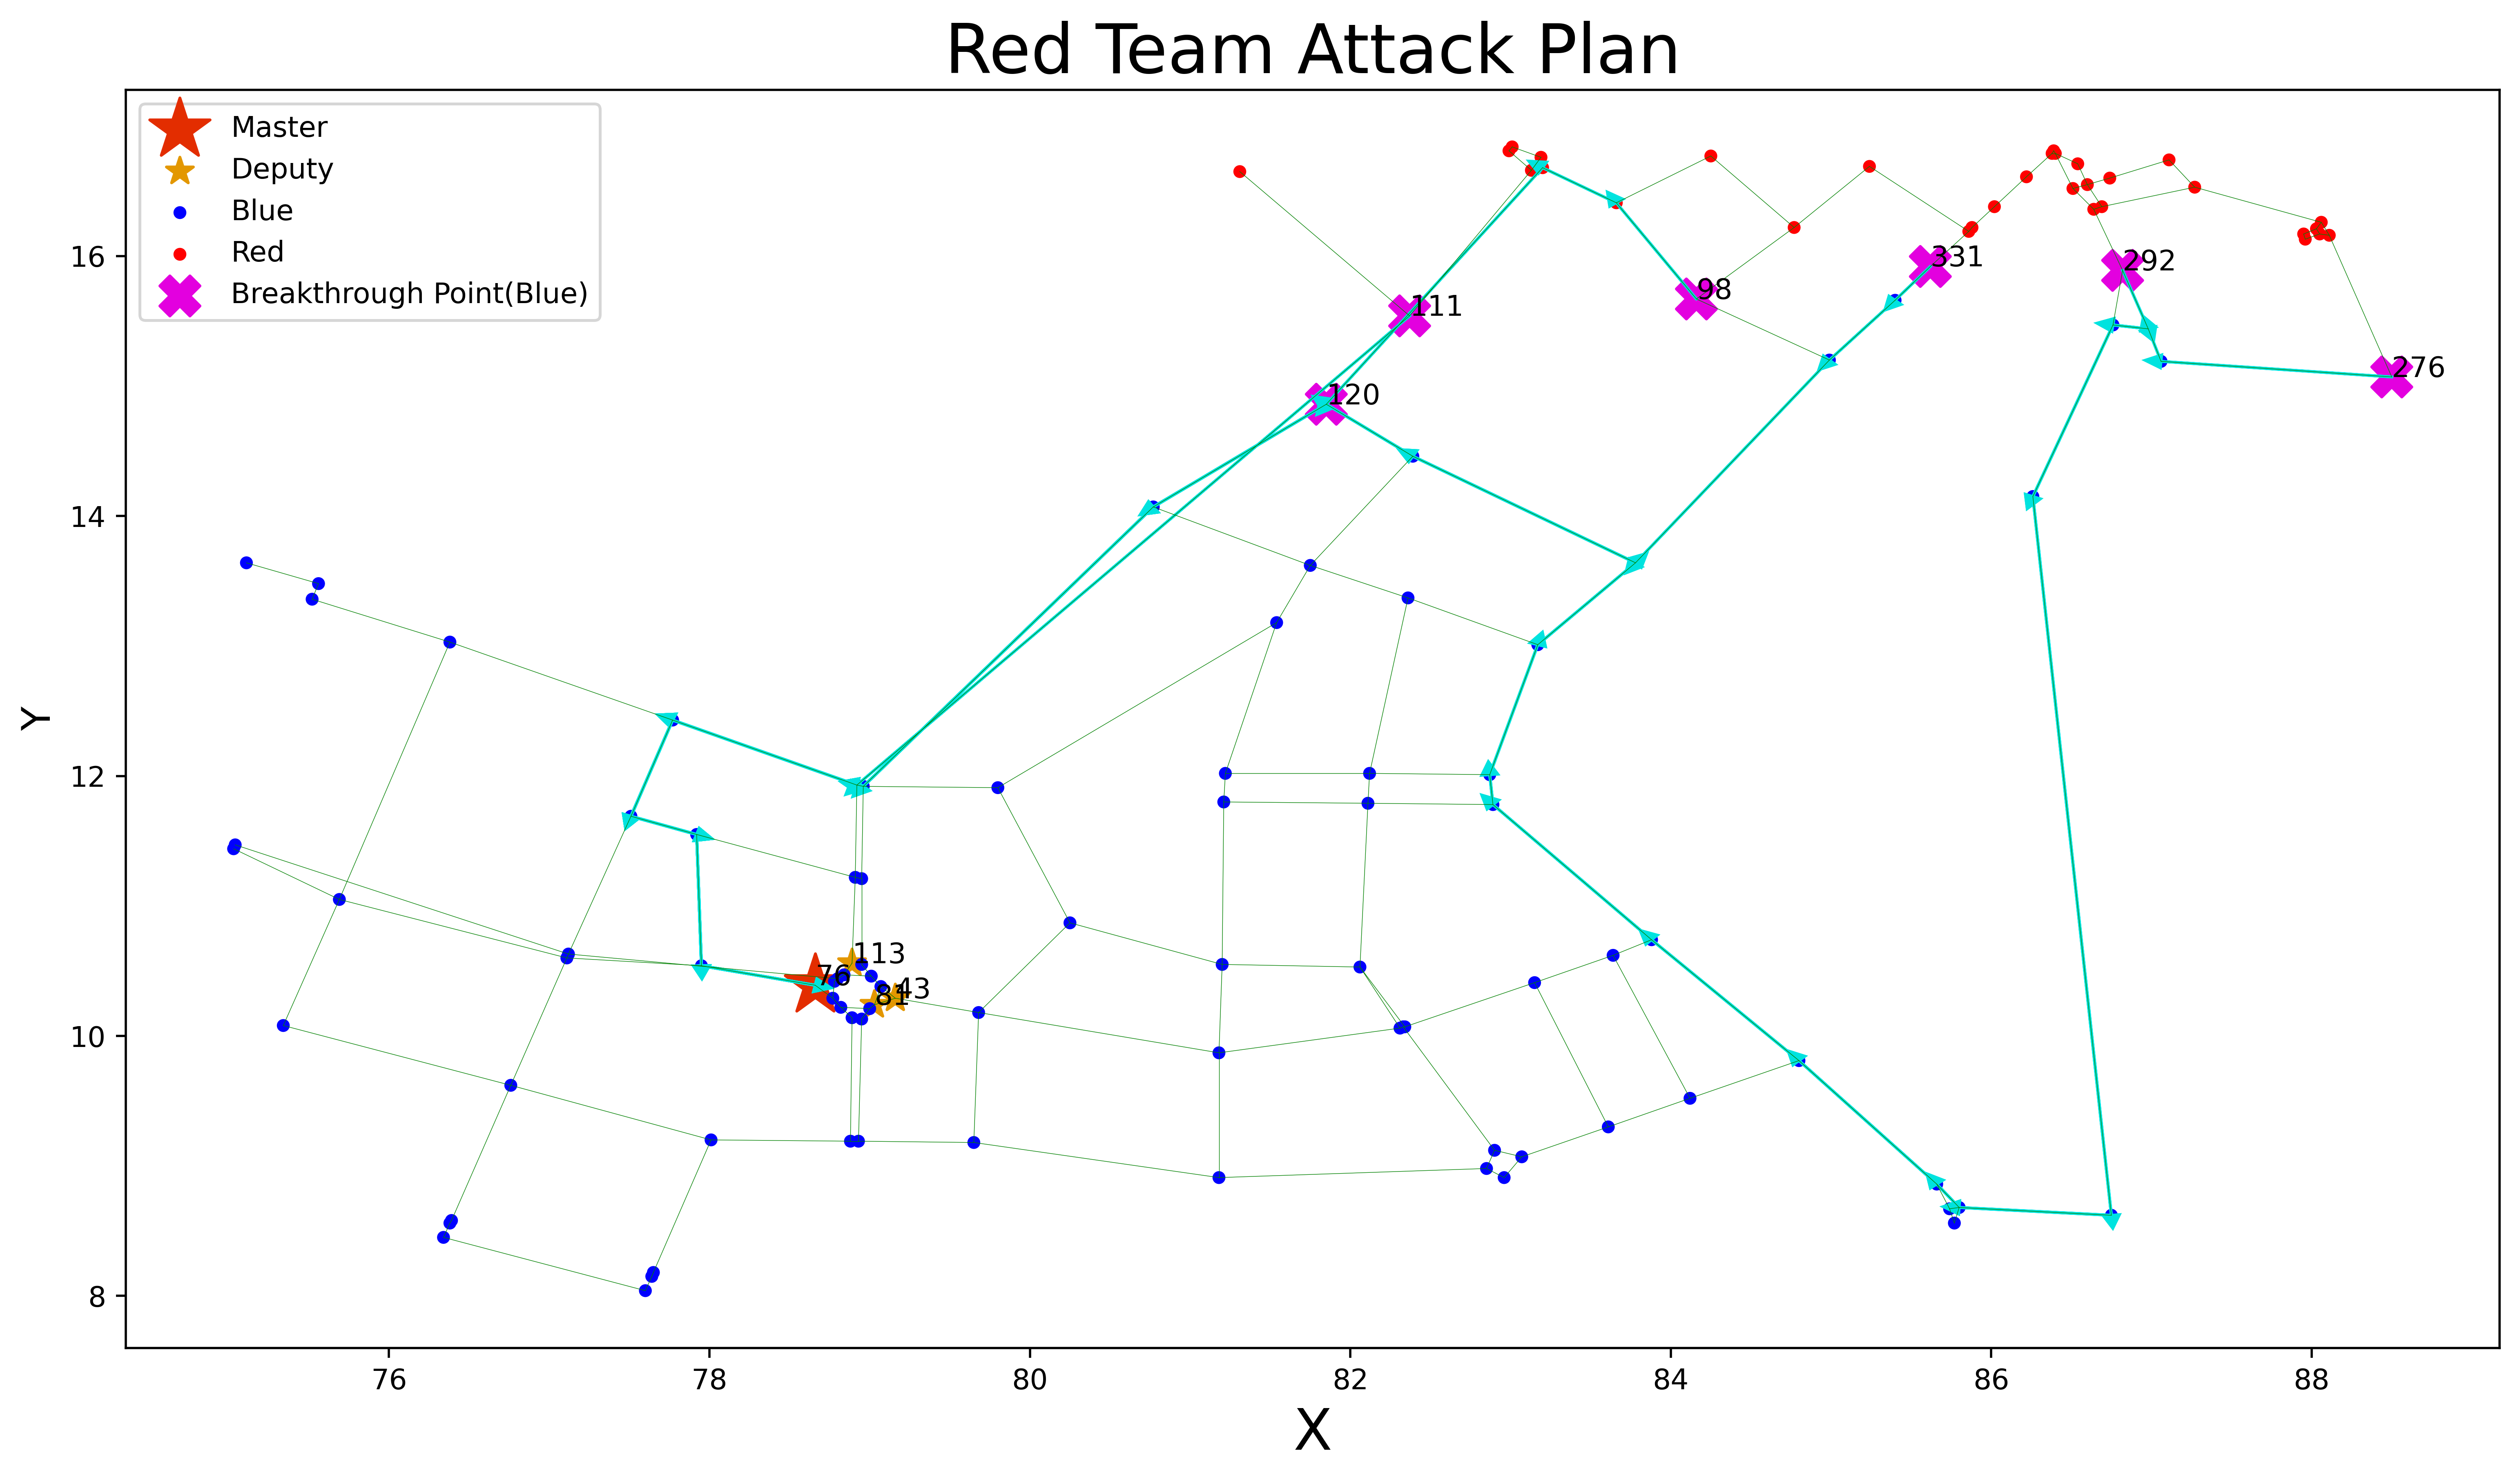

In [3]:
import math

# 绘制攻击路线图

# 构建点
points = []
masterPoint = []
deputyPoint = []
commonPoint = []
redPoint = []
breakthroughPoint = []
breakthroughPointIdList = [111, 120, 98, 331, 292, 276]
for row in pointList:
    id_ = row[0]
    x = row[1]
    y = row[2]
    if 75 < x and x < 90 and 8 < y and y < 17:
        points.append([x, y, id_, "#e32d00", "*", "master", 500])
        redPoint.append([x, y, id_, "r", ".", "point", 50])

for row in pointEnemyList:
    id_ = row[0]
    x = row[1]
    y = row[2]
    if 75 < x and x < 90 and 8 < y and y < 17:
        if id_ in [76]:
            # 主基地
            points.append([x, y, id_, "#e32d00", "*", "master", 500])
            masterPoint.append([x, y, id_, "#e32d00", "*", "master", 500])
        elif id_ in [113, 81, 43]:
            # 副基地
            points.append([x, y, id_, "#e39700", ",", "deputy", 100])
            deputyPoint.append([x, y, id_, "#e39700", ",", "deputy", 100])
        else:
            points.append([x, y, id_, "b", ".", "point", 50])
            if id_ not in breakthroughPointIdList:
                commonPoint.append([x, y, id_, "b", ".", "point", 50])
            else:
                breakthroughPoint.append([x, y, id_, "#e300df", ".", "point", 200])

plt.close()
plt.figure(dpi=500, figsize=(15, 8))
plt.title(f"Red Team Attack Plan", fontsize=24)
# plt.axis([70, 100, 0, 30])
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=14)
# 画点
existFlag = []

masterPoint = np.array(masterPoint)
plt.scatter(
    np.array(masterPoint[:, [0]], float),
    np.array(masterPoint[:, [1]], float),
    color="#e32d00",
    s=np.array(masterPoint[:, [6]], float),
    marker="*",
    label="Master",
)
deputyPoint = np.array(deputyPoint)
plt.scatter(
    np.array(deputyPoint[:, [0]], float),
    np.array(deputyPoint[:, [1]], float),
    color="#e39700",
    s=np.array(deputyPoint[:, [6]], float),
    marker="*",
    label="Deputy",
)
commonPoint = np.array(commonPoint)
plt.scatter(
    np.array(commonPoint[:, [0]], float),
    np.array(commonPoint[:, [1]], float),
    color="b",
    s=np.array(commonPoint[:, [6]], float),
    marker=".",
    label="Blue",
)
redPoint = np.array(redPoint)
plt.scatter(
    np.array(redPoint[:, [0]], float),
    np.array(redPoint[:, [1]], float),
    color="r",
    s=np.array(redPoint[:, [6]], float),
    marker=".",
    label="Red",
)
breakthroughPoint = np.array(breakthroughPoint)
plt.scatter(
    np.array(breakthroughPoint[:, [0]], float),
    np.array(breakthroughPoint[:, [1]], float),
    color="#e300df",
    s=np.array(breakthroughPoint[:, [6]], float),
    marker="X",
    label="Breakthrough Point(Blue)",
)

# 连线
pointId = np.array(np.mat(np.array(points)[:, [2]], dtype=float).T, int)[0].tolist()
for row in list(sheet_distance.values)[1:]:
    fromId = int(row[1])
    toId = int(row[2])
    if fromId not in pointId or toId not in pointId:
        continue
    x = [pointMap[fromId][1], pointMap[toId][1]]
    y = [pointMap[fromId][2], pointMap[toId][2]]
    plt.plot(x, y, color="g", linewidth=0.2)

# 进攻路线
for row in redTeamAttackPlan[:, :]:
    row = (row[row != "None"]).tolist()
    arr = list(map(int, row))
    for idx in range(1, len(arr)):
        fromId = arr[idx - 1]
        toId = arr[idx]
        x = [pointMap[fromId][1], pointMap[toId][1]]
        y = [pointMap[fromId][2], pointMap[toId][2]]
        plt.arrow(
            x[0],
            y[0],
            x[1] - x[0],
            y[1] - y[0],
            color="#00e3df",
            head_width=0.1,
            head_length=0.1,
        )

# 标注点id
for row in points:
    if row[2] in [113, 81, 43] + [76] + breakthroughPointIdList:
        plt.text(row[0], row[1], int(row[2]), fontsize=10)
plt.legend(loc=2)
plt.savefig("./Red Team Attack Plan.png")
plt.show()

D:\ProgramData\Miniconda3\lib\site-packages\shapely\ops.py:42: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  source = iter(source)
D:\ProgramData\Miniconda3\lib\site-packages\alphashape\optimizealpha.py:41: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return all([polygon.intersects(point) for point in points])
D:\ProgramData\Miniconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


1
2
3


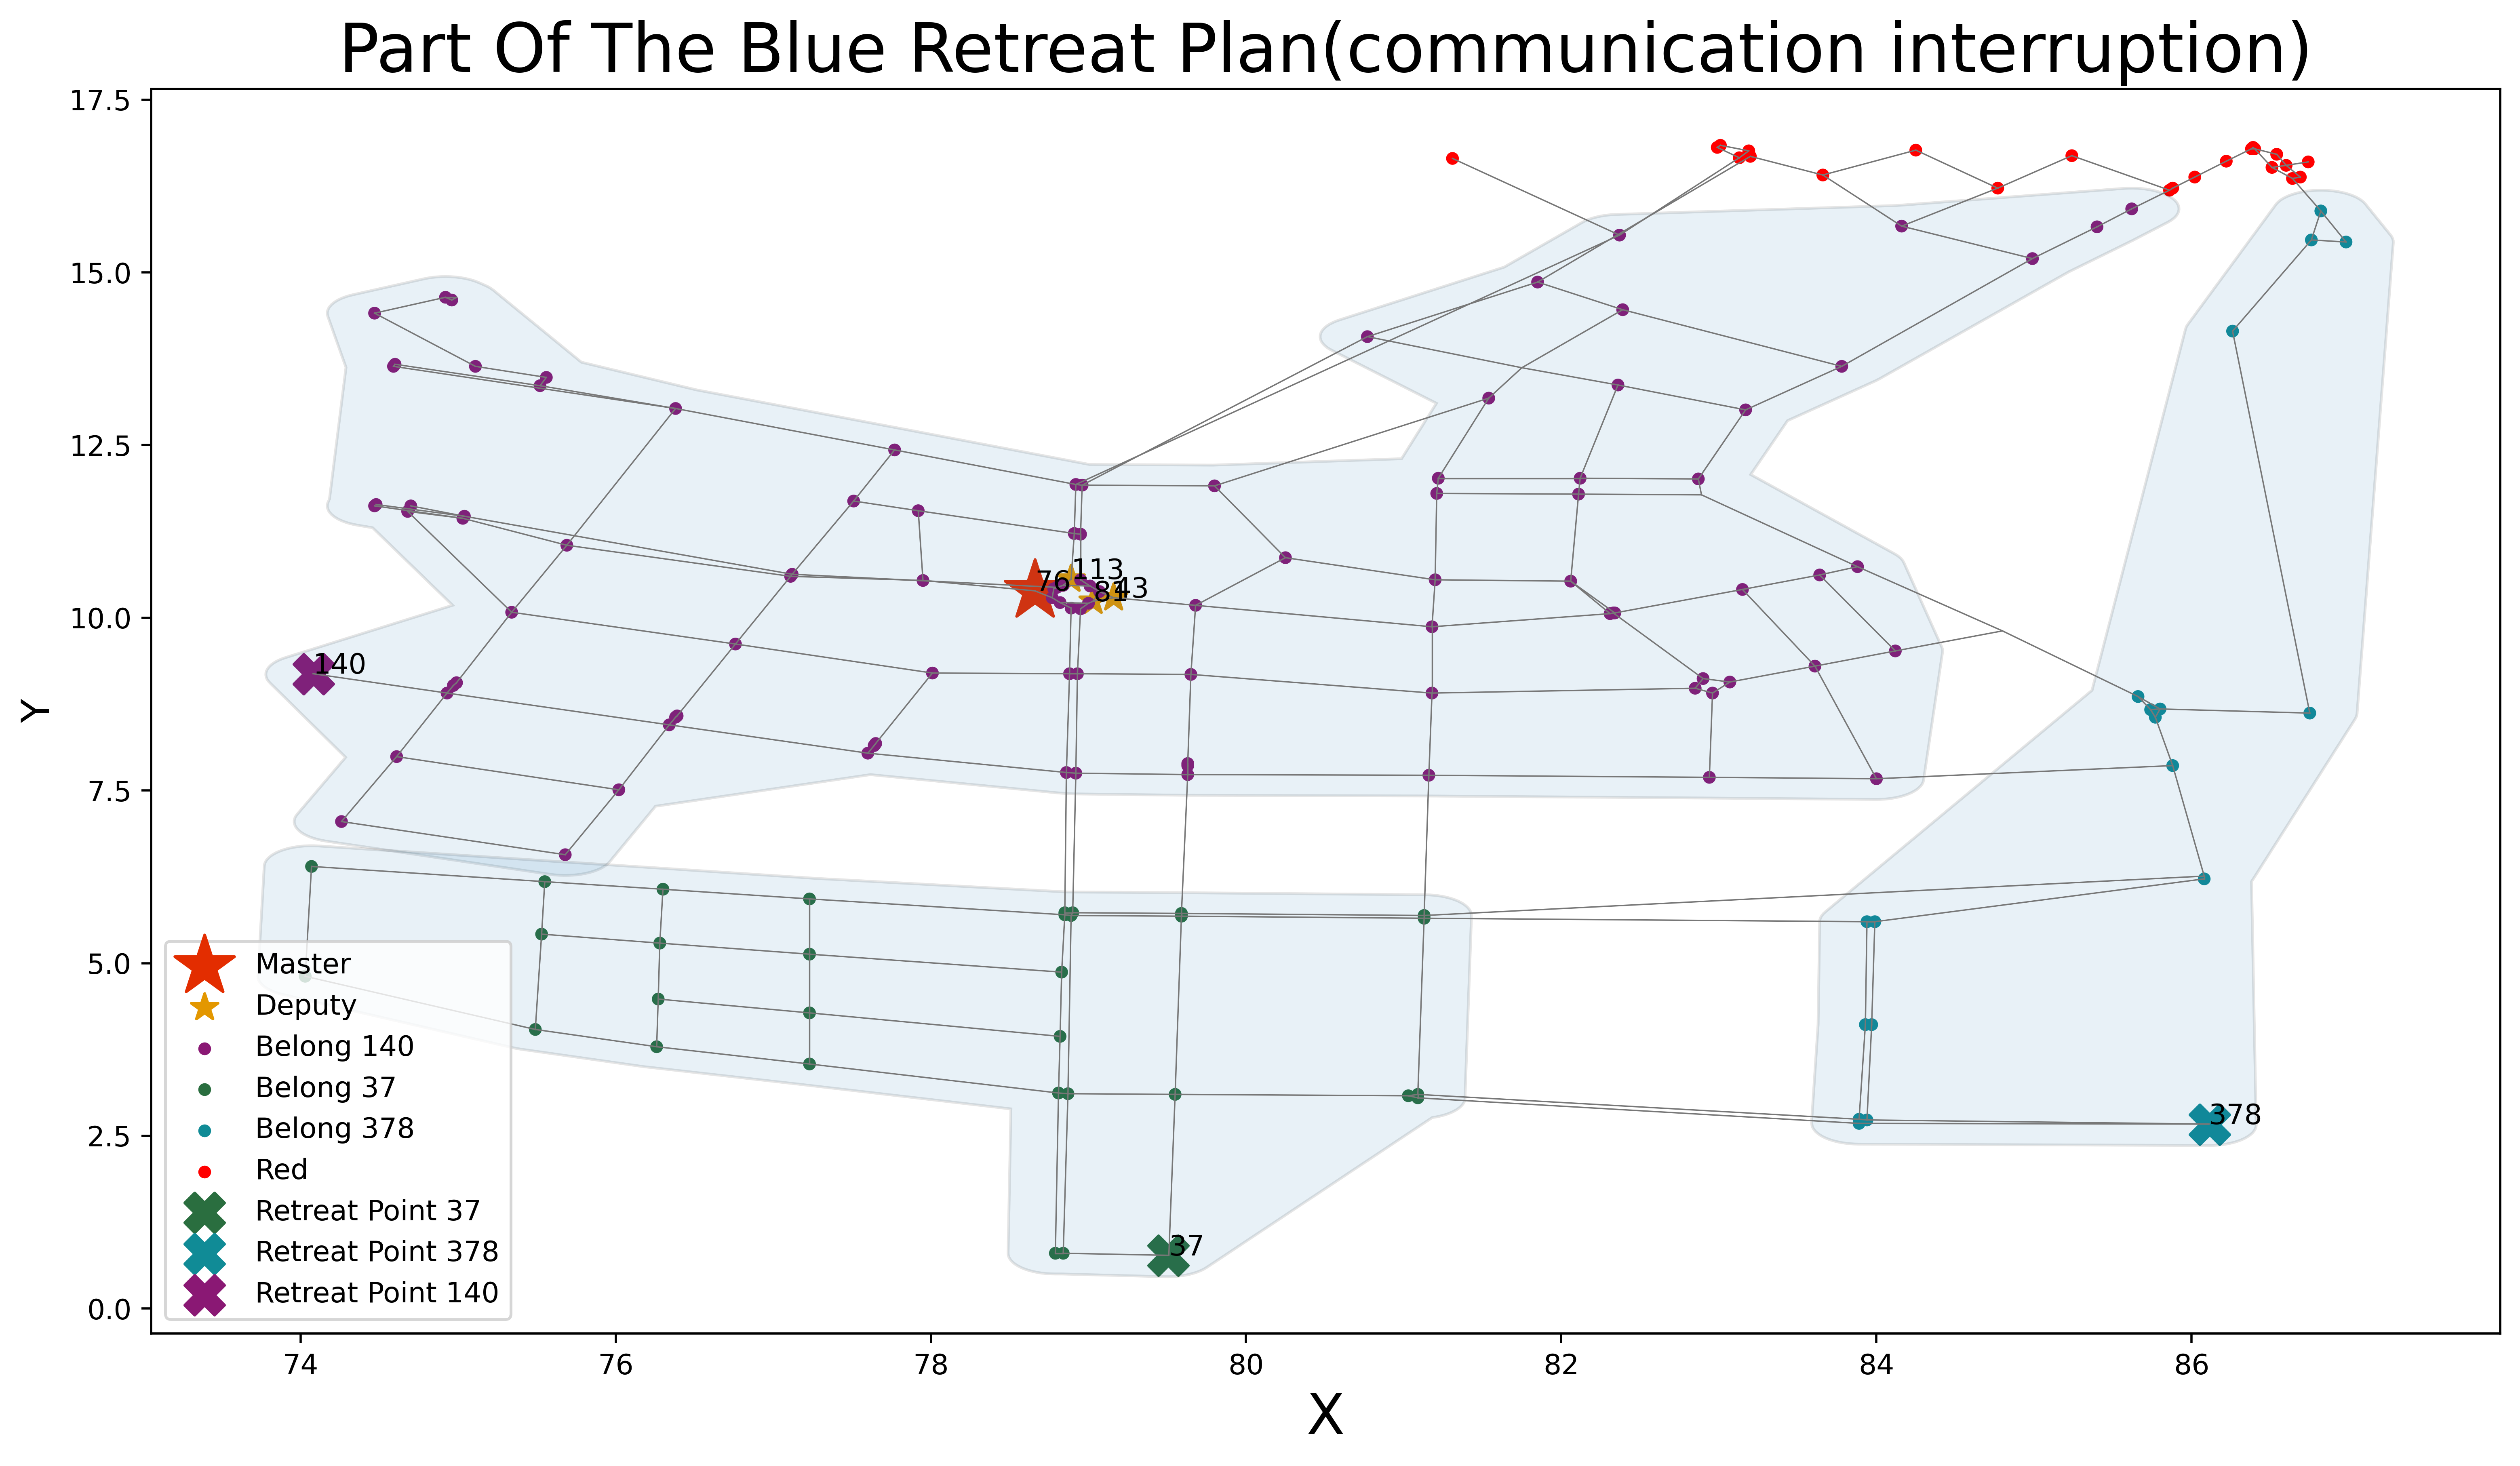

In [4]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from openpyxl import load_workbook

wb = load_workbook("../1.xlsx")
sheets = wb.worksheets
sheet_point_list = sheets[0]
sheet_distance = sheets[1]
targetCamp = "red"
enemyCamp = "blue"
pointListAll = np.array(list(sheet_point_list.values)[1:])

pointMap = {}
for row in np.around(np.array(pointListAll[:, [0, 1, 2]], float), 2):
    pointMap[int(row[0])] = row

pointList = pointListAll[pointListAll[:, 3] == targetCamp]
pointList = pointList[:, [0, 1, 2]]
pointList = np.around(np.array(pointList, float), 2)

pointEnemyList = pointListAll[pointListAll[:, 3] == enemyCamp]
pointEnemyList = pointEnemyList[:, [0, 1, 2]]
pointEnemyList = np.around(np.array(pointEnemyList, float), 2)

# 导入攻击路线图
wb = load_workbook("./通讯中断的撤退路线.xlsx")
retreatPlanSheet = wb.worksheets[0]
retreatPlan = np.array(list(retreatPlanSheet.values), str)[1:4, 1:]
retreatPlanLinerList = retreatPlan.reshape(-1)
retreatPlanLinerList = np.array(
    np.unique(retreatPlanLinerList[retreatPlanLinerList != "None"]), int
)
exist140PointIdList = retreatPlan[1]
exist140PointIdList = np.array(exist140PointIdList[exist140PointIdList != "None"], int)
exist37PointIdList = retreatPlan[0]
exist37PointIdList = np.array(exist37PointIdList[exist37PointIdList != "None"], int)
exist378PointIdList = retreatPlan[2]
exist378PointIdList = np.array(exist378PointIdList[exist378PointIdList != "None"], int)
# print(exist37PointIdList)

# 绘制撤退路线

# 构建点
points = []
masterPoint = []
deputyPoint = []
commonPoint = []
redPoint = []
demoRetreatPoint = []
demoRetreatPointIdList = [340, 95, 89, 28, 300]
exsiPointList = []
exsiPointIdList = [140, 37, 378]

exist140PointList = []
exist37PointList = []
exist378PointList = []
for row in pointList:
    id_ = row[0]
    x = row[1]
    y = row[2]
    if 72 < x and x < 87 and 0 < y and y < 17:
        points.append([x, y, id_, "#e32d00", "*", "master", 500])
        redPoint.append([x, y, id_, "r", ".", "point", 50])
for row in pointEnemyList:
    id_ = row[0]
    x = row[1]
    y = row[2]
    if 72 < x and x < 87 and 0 < y and y < 17:
        if id_ in [76]:
            # 主基地
            points.append([x, y, id_, "#e32d00", "*", "master", 500])
            masterPoint.append([x, y, id_, "#e32d00", "*", "master", 500])
        elif id_ in [113, 81, 43]:
            # 副基地
            points.append([x, y, id_, "#e39700", ",", "deputy", 100])
            deputyPoint.append([x, y, id_, "#e39700", ",", "deputy", 100])
        else:
            points.append([x, y, id_, "b", ".", "point", 50])
            if id_ in demoRetreatPointIdList:
                demoRetreatPoint.append([x, y, id_, "#e300df", ".", "point", 200])
            elif id_ in exsiPointIdList:
                exsiPointList.append([x, y, id_, "#e300df", ".", "point", 200])
            elif id_ in exist140PointIdList:
                exist140PointList.append([x, y, id_, "b", ".", "point", 50])
            elif id_ in exist37PointIdList:
                exist37PointList.append([x, y, id_, "b", ".", "point", 50])
            elif id_ in exist378PointIdList:
                exist378PointList.append([x, y, id_, "b", ".", "point", 50])

                # commonPoint.append([x, y, id_, "b", ".", "point", 50])


plt.close()
# plt.figure(dpi=500, figsize=(15, 8))
fig, ax = plt.subplots(dpi=500, figsize=(15, 8))
plt.title(f"Part Of The Blue Retreat Plan(communication interruption)", fontsize=24)
# plt.axis([70, 100, 0, 30])
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=14)
# 画点
existFlag = []

masterPoint = np.array(masterPoint)
plt.scatter(
    np.array(masterPoint[:, [0]], float),
    np.array(masterPoint[:, [1]], float),
    color="#e32d00",
    s=np.array(masterPoint[:, [6]], float),
    marker="*",
    label="Master",
)
deputyPoint = np.array(deputyPoint)
plt.scatter(
    np.array(deputyPoint[:, [0]], float),
    np.array(deputyPoint[:, [1]], float),
    color="#e39700",
    s=np.array(deputyPoint[:, [6]], float),
    marker="*",
    label="Deputy",
)

exist140PointList = np.array(exist140PointList)
plt.scatter(
    np.array(exist140PointList[:, [0]], float),
    np.array(exist140PointList[:, [1]], float),
    color="#8a1874",
    s=np.array(exist140PointList[:, [6]], float),
    marker=".",
    label="Belong 140",
)
exist37PointList = np.array(exist37PointList)
plt.scatter(
    np.array(exist37PointList[:, [0]], float),
    np.array(exist37PointList[:, [1]], float),
    color="#2a6e3f",
    s=np.array(exist37PointList[:, [6]], float),
    marker=".",
    label="Belong 37",
)
exist378PointList = np.array(exist378PointList)
plt.scatter(
    np.array(exist378PointList[:, [0]], float),
    np.array(exist378PointList[:, [1]], float),
    color="#108b96",
    s=np.array(exist378PointList[:, [6]], float),
    marker=".",
    label="Belong 378",
)

# commonPoint = np.array(commonPoint)
# plt.scatter(
#     np.array(commonPoint[:, [0]], float),
#     np.array(commonPoint[:, [1]], float),
#     color="b",
#     s=np.array(commonPoint[:, [6]], float),
#     marker=".",
#     label="Blue",
# )
redPoint = np.array(redPoint)
plt.scatter(
    np.array(redPoint[:, [0]], float),
    np.array(redPoint[:, [1]], float),
    color="r",
    s=np.array(redPoint[:, [6]], float),
    marker=".",
    label="Red",
)
# exsiPointList = np.array(exsiPointList)
# plt.scatter(
#     np.array(exsiPointList[:, [0]], float),
#     np.array(exsiPointList[:, [1]], float),
#     color="#e300df",
#     s=np.array(exsiPointList[:, [6]], float),
#     marker="X",
#     label="Retreat Point",
# )

# 37号出口
plt.scatter(
    79.5065250000029,
    0.767699999999631,
    color="#2a6e3f",
    s=200,
    marker="X",
    label="Retreat Point 37",
)
# 378号出口
plt.scatter(
    86.1134000000021,
    2.66500000000036,
    color="#108b96",
    s=200,
    marker="X",
    label="Retreat Point 378",
)
# 140号出口
plt.scatter(
    74.0826250000026,
    9.18876666666554,
    color="#8a1874",
    s=200,
    marker="X",
    label="Retreat Point 140",
)

# 连线
pointId = np.array(np.mat(np.array(points)[:, [2]], dtype=float).T, int)[0].tolist()
for row in list(sheet_distance.values)[1:]:
    fromId = int(row[1])
    toId = int(row[2])
    if fromId not in pointId or toId not in pointId:
        continue
    x = [pointMap[fromId][1], pointMap[toId][1]]
    y = [pointMap[fromId][2], pointMap[toId][2]]
    plt.plot(x, y, color="#777", linewidth=0.5)

# # 撤退路线
# for row in retreatPlan[2:3, :]:
#     row = (row[row != "None"]).tolist()
#     arr = list(map(int, row))
#     for idx in range(1, len(arr)):
#         fromId = arr[idx - 1]
#         toId = arr[idx]
#         fromId, toId = toId, fromId
#         x = [pointMap[fromId][1], pointMap[toId][1]]
#         y = [pointMap[fromId][2], pointMap[toId][2]]
#         plt.arrow(
#             x[0],
#             y[0],
#             x[1] - x[0],
#             y[1] - y[0],
#             color="#00e3df",
#             head_width=0.1,
#             head_length=0.1,
#         )

# 标注点id
for row in points:
    if row[2] in [113, 81, 43] + [76] + exsiPointIdList:
        plt.text(row[0], row[1], int(row[2]), fontsize=10)

# 轮廓图
import alphashape
from descartes import PolygonPatch

count = 1
for idx, item in enumerate([exist140PointList, exist37PointList, exist378PointList]):
    pointList = np.copy(np.around(np.array(item[:, 0:2], float), 2))
    if idx == 0:
        pointList = np.append(pointList, np.array([[74.08, 9.18]]), axis=0)
    elif idx == 1:
        pointList = np.append(pointList, np.array([[79.50, 0.76]]), axis=0)
    elif idx == 2:
        pointList = np.append(pointList, np.array([[86.11, 2.66]]), axis=0)

    # print(pointList)
    alpha_shape = alphashape.alphashape(pointList)
    ax.add_patch(PolygonPatch(alpha_shape.buffer(0.3), alpha=0.1))
    print(count)
    count += 1

plt.legend(loc=3)
plt.savefig("./Part Of The Blue Retreat Plan(communication interruption)")
plt.show()